<a href="https://colab.research.google.com/github/KodumuruRaja/Regression-Algorithms/blob/main/Logistic-Regression-(Multi-Class-Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [ ]:
data=load_digits()

In [ ]:
data

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

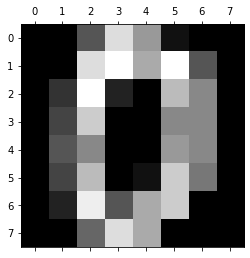

In [ ]:
plt.gray()
plt.matshow(data.images[0])

<Figure size 432x288 with 0 Axes>

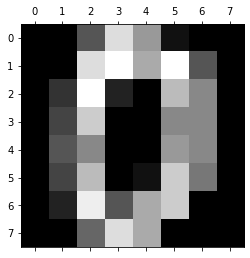

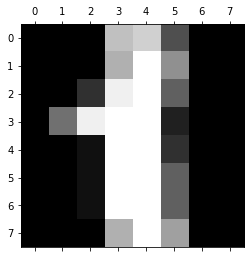

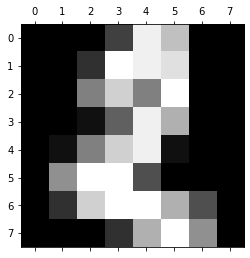

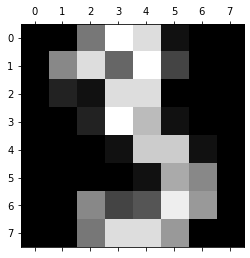

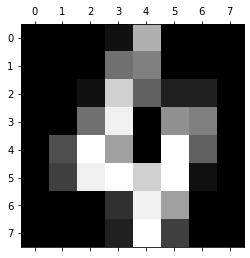

In [ ]:
plt.gray()
for i in range(5):
  plt.matshow(data.images[i])

In [ ]:
data.target[0:5]

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.20)

In [ ]:
len(x_train),len(x_test)

(1437, 360)

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lreg.score(x_test,y_test)

0.9583333333333334

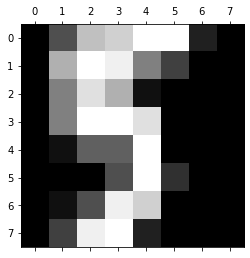

In [ ]:
plt.matshow(data.images[15])

In [ ]:
lreg.predict([data.data[15]])

array([5])

In [ ]:
data.target[15]

5

In [ ]:
lreg.predict(data.data[5:10])

array([5, 6, 7, 8, 5])

In [ ]:
y_pred=lreg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[41,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  2,  1,  0,  0,  2,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 30]])

Text(69.0, 0.5, 'Truth')

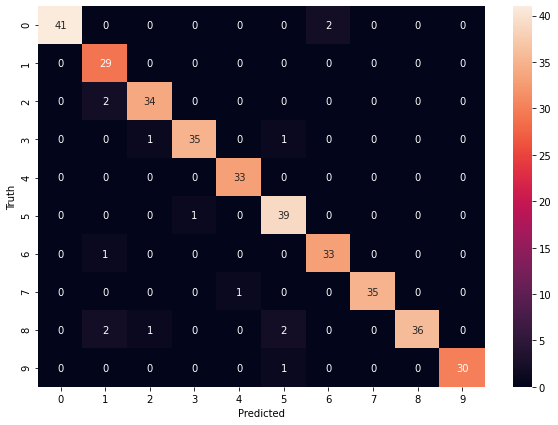

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')